# COVID-19 outbreak--Testing, prediction and simulation
#### CHE 116: Numerical Methods and Statistics
*Hao Huang*

*31706612*

Note: 
This project is done by Hao Huang. 


Email address: hhuang44@.rochester.edu

In [1]:
import scipy.optimize
import scipy.stats as ss
import numpy as np
np.set_printoptions(threshold=np.inf)
import random
from math import *
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
import time
import pylab as pl
from IPython import display
%matplotlib inline

# Abstract

The purpose of this project is to use mathematical model to describe Covid-19 epidemic growth in both test and no test condition, and use the model to predict the number of future cases and deaths. The data being used describe the date, cases and deaths of Covid-19 virus from 2020-01-21 to 2020-04-28. All of the data are retrieved from Github[1] and have been verified by The New York Times[2]. 

Firstly, based on the traditional exponential model of epidemic growth, I choose a typical exponential growth period (which starts from 46th day and ends at 60th day) and use non-linear regression to calculate model parameters. After that, I use $R^{2}$ and Shapiro-Wilk test and find out that the model well describe virus growth in that period. Additionally, I try to use exponential model to see what will happen if there is no test and other restrictions on virus

Secondly, I set the 46th day as the initial point and use the parameters in exponential growth model in part1 to deduce relative parameters for Logistic growth model[4].. After that, I try to use the model to fit and predict future growth but only to find very large error, which means the deduced parameters does not work here. In viewing of this, I use non-linear regression to calculate the parameters of Logistic growth model and use the model to predict final confirmed cases in US. Althouth this time the model seems to fit data well mathematically, the predicted final cases may not be precise due to near-linear growth since the 60th day. 

Finally, based on some buildings of University of Rochester and their geographical positions, taking into account the gym, canteen, dorms, and lecturing building, I create a simulation system in which students have both random and orienteering movement during the day in order to simulate the virus spread among students. The whole process are presentated in an animation-like interface. As I did not care much about calculation efficiency, it may takes some time to run the code in part3 and I strongly recommend doing that in localhost.  However, due to the unsolved complicated relationship of the probability of spread in each iteration and real-life infectious rate, this simulation doesn't make a lot of practical sense. You may merely consider this as a game lol!


## Part1. Exponential Model of Virus Outbreak in a typical period
According to Wikipedia, exponential model fits the early stage of virus outbreak very well. In this part, I am going to firstly choose a  typical period according to the daily cases growth rate. Secondly, based on the traditional exponential model of epidemic growth, I use non-linear regression to calculate model parameters and use $R^{2}$ and Shapiro-Wilk test to see if the assumption is good. 

The exponential model for virus break is $$y=\beta_{0}e^{\frac{t-\beta_{2}}{\beta_{1}}}$$

Where $\beta_{1}$ stands for the time it requires to make cases e times compared with last moment. I divide original $\beta_{0}$ and create $\beta_{2}$ because $\beta_{2}$ may indicate the stasitical starting point of exponential growth. Additionally, $\beta_{2}$ and $\beta_{1}$ have instructional effect to calculate the parameters--$r$ and $f(0)$ in Logistic model which I will discuss later.

In [2]:
# import US confirmed case data and have first sight
US_data=pd.read_csv('us_covid19.csv')
print(US_data)
print(len(US_data))
US_data=np.array(US_data)
print(len(US_data))

          date    cases  deaths
0   2020-01-21        1       0
1   2020-01-22        1       0
2   2020-01-23        1       0
3   2020-01-24        2       0
4   2020-01-25        3       0
..         ...      ...     ...
94  2020-04-24   904604   46503
95  2020-04-25   938752   48325
96  2020-04-26   965214   49464
97  2020-04-27   988250   50819
98  2020-04-28  1012683   53034

[99 rows x 3 columns]
99
99


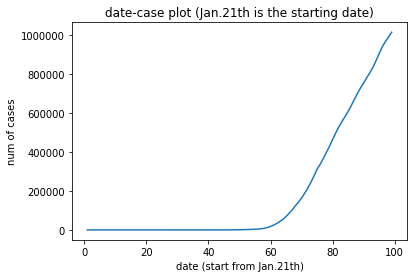

We can see from this plot that the number of cases seem to be exponential in the initial stage and linear afterwards, which means we cannot use a simple exponential model to describe it. Here, I am going to choose a typical exponenial growing period and calculate the parameters of the model.


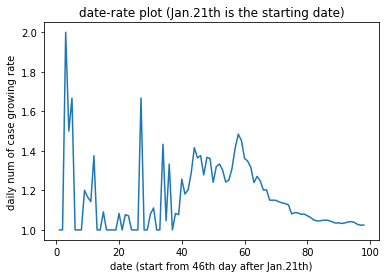

We can see from the plot that the daily growing rate in the period from 46th day to 60th day is relatively stable, which means it is more like an exponential growth. Let us plot the num of cases in this interval.


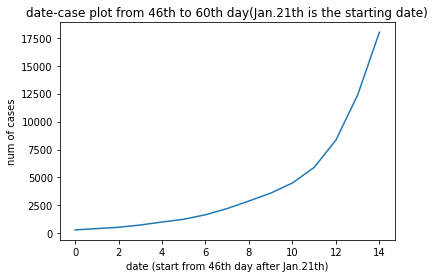

Considering the shape of the plot and relative stable daily growing rate, I am going to use these data to calculate the exponential growing model parameters to instruct parameters in 


In [3]:
# get x(date) & y(confirmed case) data and plot
x0=np.arange(1,100)
y0=np.array(US_data[:,1])
y0=y0.astype(float)
plt.plot(x0,y0)
plt.title('date-case plot (Jan.21th is the starting date)')
plt.xlabel('date (start from Jan.21th)')
plt.ylabel('num of cases')
plt.show()
print('We can see from this plot that the number of cases seem to be exponential in the initial stage and linear afterwards, which means we cannot use a simple exponential model to describe it. Here, I am going to choose a typical exponenial growing period and calculate the parameters of the model.')

# see the daily cases growth rate and choose a typical exponential growth period
rate=[]
for i in range(1,99):
    rate.append(y0[i]/y0[i-1])
plt.plot(np.arange(1,99),rate)
plt.title('date-rate plot (Jan.21th is the starting date)')
plt.xlabel('date (start from 46th day after Jan.21th)')
plt.ylabel('daily num of case growing rate')
plt.show()
print('We can see from the plot that the daily growing rate in the period from 46th day to 60th day is relatively stable, which means it is more like an exponential growth. Let us plot the num of cases in this interval.')

x=np.arange(60-45)
y = US_data[45:60,1]
plt.plot(x,y)
plt.title('date-case plot from 46th to 60th day(Jan.21th is the starting date)')
plt.xlabel('date (start from 46th day after Jan.21th)')
plt.ylabel('num of cases')
plt.show()
print('Considering the shape of the plot and relative stable daily growing rate, I am going to use these data to calculate the exponential growing model parameters to instruct parameters in ')

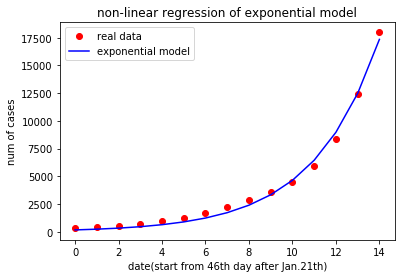

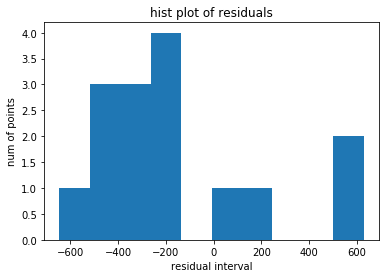

beta = [1.73802355e+02 3.03424150e+00 1.08482847e-02]
R_square = 0.9936
Shapiro-Wilk test result = (0.8868648409843445, 0.06013541296124458)
What if no test and restriction on virus are done?


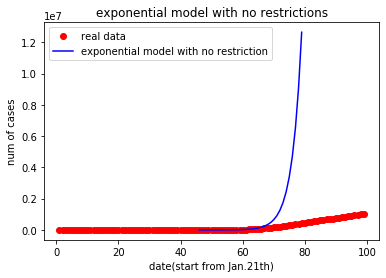

If there is no test and other restrictions and the num of cases follow exponential growth, therer will be 12641642 in the 80th day 


In [4]:
# non-linear regression to get parameters

#Create an objective function 
def obj_exp(beta, x, y):
    yhat=beta[0]*np.exp((x-beta[2])/beta[1]) # Our model equation
    resids=yhat-y 
    SSR=np.sum(resids**2) #<- square and sum them
    return SSR

#Use the minimize function, change startig points and plot
result=scipy.optimize.minimize(obj_exp, x0=[183,4,1], args=(x,y))
beta_opt=result.x 
# print(beta_opt) # print later 

y_hat=beta_opt[0]*np.exp(x/beta_opt[1]-beta_opt[2])
plt.plot(x,y,'ro',label='real data')
plt.plot(x,y_hat,'b-',label='exponential model')
plt.legend()
plt.xlabel('date(start from 46th day after Jan.21th)')
plt.ylabel('num of cases')
plt.title('non-linear regression of exponential model')
plt.show()

# Error Analysis of R2 and shapiro-wilk test
residuals=y_hat-y
plt.hist(residuals)
plt.xlabel('residual interval')
plt.ylabel('num of points')
plt.title('hist plot of residuals')
plt.show()


ssr=np.sum(residuals**2)
tss=np.sum((np.mean(y)-y)**2)
rsq=1-ssr/tss

print('beta =',beta_opt)
print(f'R_square = {rsq:.4f}')
print('Shapiro-Wilk test result =',ss.shapiro(residuals))

print('What if no test and restriction on virus are done?')

x_notest=np.arange(46,80)
y_notest=beta_opt[0]*np.exp((x_notest-45)/beta_opt[1]-beta_opt[2])
plt.plot(x0,y0,'ro',label='real data')
plt.plot(x_notest,y_notest,'b-',label='exponential model with no restriction')
plt.legend()
plt.xlabel('date(start from Jan.21th)')
plt.ylabel('num of cases')
plt.title('exponential model with no restrictions')
plt.show()
print(f'If there is no test and other restrictions and the num of cases follow exponential growth, therer will be {y_notest[-1]:.0f} in the 80th day ')


Since $R^{2}$ is very close to 1 and result of shapiro-wilk test is not significant, now we get the approximate value of $\beta_{1}$ and $\beta_{2}$ that is $$\beta_{1}=3.03,\beta_{2}=45(0+45)$$

## Part2. Logistic Model of Virus Outbreak and prediction of final number of cases
We can see from the result above that exponential model does not describe long-time growth of virus cases well. However, we can use Logistic model to describe the long-term ourbreak and predit the final number of cases. 

The mathematical equation of Logistic model is  $$f(t)=K\frac{f(0)e^{rt}}{K+f(0)(e^{rt}-1)}$$

Where $f(0)$ means the num of cases in initial point and $t$ stands for time spent after initial point

The result in part1 shows that $\beta_{1}=3.03,\beta_{2}=45$. Firstly, given the data are true, we can assume that the virus did not have a exponential outbreak until 45th day(Mar.5th). Since this date is when most Universities published the online course policy and were aware of the serious condition to come, we can consider this assumption reasonable, which means the initial value in that point is $f(0)=311$, which is exactly the case number in the 45th day. 

Secondly, we can calculate r from $\beta_{1}$ that $r=e^{\frac{1}{\beta_{1}}}-1=0.39$

 Let us try to use the $r$ and $f(0)$ data above to do non-linear regression to optimize K

In [5]:
x=x0[45:100]
print(x)

[46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98 99]


[571896.5734984]


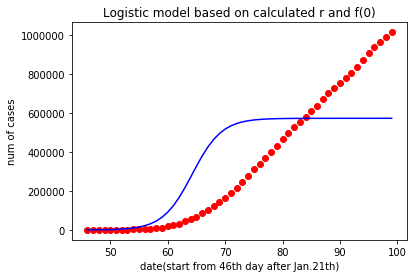

The result is terrible, which indicates that the calculated r and f(0) are not so good, we also need to optimize them


In [6]:
x=x0[45:100]
y=y0[45:100]
def obj_logi(K, x, y):
    y_hat = K*311*np.exp(0.39*(x-45))/(K+311*(np.exp(0.39*(x-45))-1))# Our model equation
    resids = y_hat - y 
    SSR = np.sum(resids**2) #<- square and sum them
    return SSR

result=scipy.optimize.minimize(obj_logi, x0=1000000, args=(x,y))
K_opt=result.x 
print(K_opt)



y_hat=311*np.exp(0.39*(x-45))/(K_opt+311*(np.exp(0.39*(x-45))-1))*K_opt
plt.plot(x,y,'ro',label='real data')
plt.plot(x,y_hat,'b-',label='Logistic model')
plt.title('Logistic model based on calculated r and f(0)')
plt.xlabel('date(start from 46th day after Jan.21th)')
plt.ylabel('num of cases')
plt.legend
plt.show()

print('The result is terrible, which indicates that the calculated r and f(0) are not so good, we also need to optimize them')


[1.07609486e+06 1.34878222e-01 2.22984694e+01]


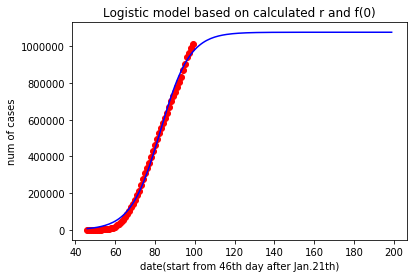

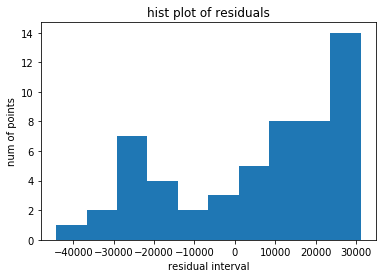

R_square = 0.9959
Shapiro-Wilk test result = (0.9032226204872131, 0.00036666946834884584)
The predicted number of infecious case is 1076095
We can see from the plot that the regression this time is much better because the R_square is very close to 1, but we should also realize that shapiro-wilk test reject the normanality of residuals


In [7]:
x=x0[45:100]
xp=np.arange(46,200,1)
y=y0[45:100]
def obj_logi(logi, x, y):
    y_hat = logi[0]*311*np.exp(logi[1]*(x-logi[2]))/(logi[0]+311*(np.exp(logi[1]*(x-logi[2]))-1))# Our model equation
    resids = y_hat - y 
    SSR = np.sum(resids**2) #<- square and sum them
    return SSR


result = scipy.optimize.minimize(obj_logi, x0=[1000000,0.2,45], args=(x,y))
K_opt = result.x 
print(K_opt)
#print(y_hat)

y_hat=311*np.exp(K_opt[1]*(xp-K_opt[2]))/(K_opt[0]+311*(np.exp(K_opt[1]*(xp-K_opt[2]))-1))*K_opt[0]
plt.plot(x,y,'ro')
plt.plot(xp,y_hat,'b-')
plt.title('Logistic model based on calculated r and f(0)')
plt.xlabel('date(start from 46th day after Jan.21th)')
plt.ylabel('num of cases')
plt.legend
plt.show()



# see how good is the regression
residuals=y_hat[0:54]-y
plt.hist(residuals)
plt.xlabel('residual interval')
plt.ylabel('num of points')
plt.title('hist plot of residuals')
plt.show()

ssr=np.sum(residuals**2)
tss=np.sum((np.mean(y)-y)**2)
rsq=1-ssr/tss


print(f'R_square = {rsq:.4f}')
print('Shapiro-Wilk test result =',ss.shapiro(residuals))
print(f'The predicted number of infecious case is {y_hat[-1]:.0f}')
print('We can see from the plot that the regression this time is much better because the R_square is very close to 1, but we should also realize that shapiro-wilk test reject the normanality of residuals')



### further reflection on predicted final numberof cases
The regression and prediction based on Logistic model seems to be good mathematically. However, we have to admit that the near-linear growth from 70th to 90th days does bring much error to our final prediction. There many reasons that may result in the distortion of data such as insufficient test ability, underreported cases and people who refuse to take this epidemic seriously, which all have a influence on our prediction. 

I know that my prediction has a high probability of being inaccurate, but the process of working with data is quite interesting. However, I know these numbers are far more than just numbers, I truly hope US can go through this crisis as soon as possible. 



## Part3. a game to simulate covid-19 virus spread based on UR campus

Based on some buildings of University of Rochester and their geographical positions, taking into account the gym, canteen, dorms, and lecturing building, I create a simulation system in which students have both random and orienteering movement during the day in order to simulate the virus spread among students. 

The whole process are presentated in an animation-like interface. As I did not care much about calculation efficiency, it may takes some time to run the code in part3 and I strongly recommend doing that in localhost. However, due to the unsolved complicated relationship of the probability of spread in each iteration and real-life infectious rate, this simulation doesn't make a lot of practical sense. You may merely consider this as a game lol!

### Assumption1: Students go to different places in different time.
Here I consider only 4 type of places--dorm, classroom, gym and canteen.
All students stay in drom from 7pm to 8am. All students go to classroom from 8am to 12pm. All students go to canteen from 12pm to 1pm.
From 1pm to 4pm, half students will be arranged in the classroom and the other half will go back go dorm, this is arranged randomly. 
From 4pm to 6pm, 33% students will stay in the classroom, 33% to the gym and 33% in the dorm.
From 6pm to 7pm, all students go to canteen.
That is the whole cycle.

### Assumption2: Simulation Map
Use UR map as the simulation environment.The map and related position is shown below.


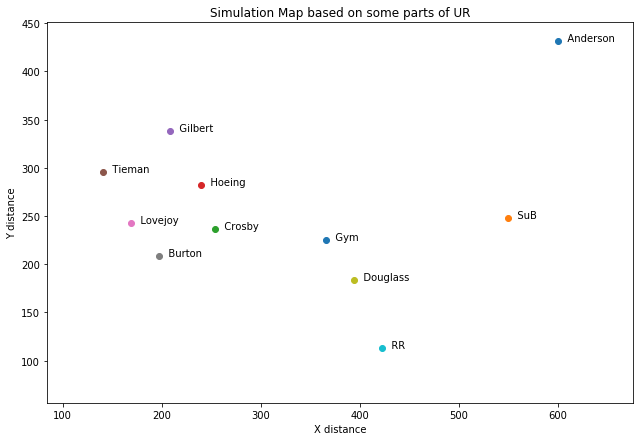

In [8]:
# Let's rebuild some buildings in UR river campus

# Generating map and positions, this is the distance I got using ruler, not the real distance.
D = dict()
D['Anderson'] = [21.3,15.3]
D['SuB']=[19.5,8.8]
D['Crosby']=[9,8.4]
D['Hoeing']=[8.5,10]
D['Gilbert']=[7.4,12]
D['Tieman']=[5,10.5]
D['Lovejoy']=[6,8.6]
D['Burton']=[7,7.4]
D['Douglass']=[14,6.5]
D['RR']=[15,4]
D['Gym']=[13,8]


# calculating real distance and make a new dictionary
# Note: 28.18 is the parameter to convert ruler distance into real distance
# The length-width ratio should be based on the xlim(x1 x2) and ylim(y1 y2) you want to set in order to keep isotropy in distance
x1=3
x2=24
y1=2
y2=16


plt.figure(figsize=((x2-x1)/2,(y2-y1)/2))  
for i in D:
    contemp=D[i]
    contemp[0]=contemp[0]*28.18
    contemp[1]=contemp[1]*28.18

# plot simulation map. The map is based on real distance
for i in D:
    contemp=D[i]
    plt.plot(contemp[0],contemp[1],'o')
    plt.text(contemp[0],contemp[1],'   '+i)
plt.xlim(x1*28.18,x2*28.18)
plt.ylim(y1*28.18,y2*28.18)
plt.title('Simulation Map based on some parts of UR')
plt.xlabel('X distance')
plt.ylabel('Y distance')
plt.show()

### Assumption3 Simplified Building Model
We assume that every building has the shape that is similar to coloum, so we can use a point(2D) and a radius(1D) to represent a building(or dormroom).
For drom, I set the radius as 3 meters. 

For Canteen,gym and classroom, I set the radius as 25 meters.

### Assumption4: Ignore the student's volume
We can use a point(2D) to represent a student's position. We do not need to care about their body size.

### Assumption5: Students will only spread virus outside the dorm
As students are seperated when they are in the dorm, we assume that they have no chance to spread the virus in the dorm.

### Assumption6: Directional and random movement
When a student go from A to B, it is called directional movement and we need to use speed vector(which contains velocity and direction, 5D) 
Students also have a random movement and this is to make our model more close to nature. When students are in classroom and canteen, random movement is relatively small because they mostly sit there. We set the random movement in these places 0-1m/observe. When students are in the gym, we set it 3meters/ observation. As we assume that virus cannot spread in the dorm, so the random movement is zero/observaton. 

### Assumption7: Observation time interval and the infectious rate setting (fail part, unable to relate it to real-life infecious rate)
We assume that if you stay with a person who is confirmed with virus, you will have 90% chance to get the virus when the time you stay less than 2m with that guy sums up to 10 minutes. 


### Assumption8:
health condition index: 0 for healthy, 1 for confirmed without sympton, 2 for confirmed with sympton


### Individual and public data format
[ dorm position(2D), current position(2D), health stage, infecious time, destination position(2D), trajectory(ND)]




In [9]:
# student data froamt
# [drom position, current position, health condition, infectious time, destination position, trajectory]
N=150  # set students numbers

student=[]
# set dorm position
for i in range(N):
    if i%8==0:
        student.append([21.3*28.18,15.3*28.18]) # Anderson
    elif i%8==1:
        student.append([19.5*28.18,8.8*28.18])  # SuB
    elif i%8==2:
        student.append([9*28.18,8.4*28.18])     # Crosby
    elif i%8==3:
        student.append([8.5*28.18,10*28.18])    # Hoeing
    elif i%8==4:
        student.append([7.4*28.18,12*28.18])    # Gilbert
    elif i%8==5:
        student.append([5*28.18,10.5*28.18])    # Tieman
    elif i%8==6:
        student.append([6*28.18,8.6*28.18])     # Lovejoy
    else:
        student.append([7*28.18,7.4*28.18])     # Burton

# set current position the same as dorm position

for i in range(N):
    student[i].append(student[i][0])
    student[i].append(student[i][1])

# set health conditon index and infectious time. The first person with virus is set as 1 and 0. Others set as 0 and 0.
student[0].append(1)
student[0].append(0)
for i in range(1,N):
    student[i].append(0)
    student[i].append(0)

# set destination data as dorm position
for i in range(N):
    student[i].append(student[i][0])
    student[i].append(student[i][1])




def generateimatrix(x):    # This is necessary because the infection state changes during the cycle, and the student data cannot be cycled, there must be a moment of observation of a previous moment of data
    'Generate NXN infection probability chance according to student current position'
    'Arg: x, which is students data'
    'Return: NXN infection chance matrix'
    N=150
    imatrix=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            # Three conditions are met at the same time: 1. one of the two people is infected and one is not infected 2. neither person is in the dormitory 3. the distance is less than 1m
            if x[i][4]*x[j][4]==0 and x[i][4]^x[j][4] and sqrt((x[i][2]-x[i][0])**2+(x[i][3]-x[i][1])**2)>3 and sqrt((x[j][2]-x[j][0])**2+(x[j][3]-x[j][1])**2)>3 and sqrt((x[i][2]-x[j][2])**2+(x[i][3]-x[j][3])**2)<1.5:
                imatrix[i][j]=1
    return imatrix




# Based on the coding before, we need to let these students 'move'
t=0  # set current time
confirmed=1
qianfu=1
sympton=0
interval=1  #dimention: minute
speed=30   # 630m/min
# When students are in classroom and canteen, random movement is relatively small because they mostly sit there. 
# We set the random movement in these places 0-1m/observe. -- simpilification：xy with 0-0.7 random movement
# When students are in the gym, we set it 3meters/ observation. 简化：xy方向各分配0-0.2.1
# As we assume that virus cannot spread in the dorm, so the random movement is 0/observaton.

# Strictly based on literature reports or other projections here!!!! Let's test the numbers ourselves first, assuming a 0.9 infection rate in 15 minutes 2m
# This means that the probability of not being infected 15 times in a row at 1-min intervals is 0.1, the probability of not being infected per minute is 0.858, and the infection rate p=0.142
p=0.02

while confirmed < N:
    # update health condition and infectious time, update time first! 
    imatrix=generateimatrix(student)
    #print(imatrix)
    # update health condition
    for i in range(N):
        if student[i][4]==1:  # if infected, time for infected +1
            student[i][5]+=1
        if student[i][4]==0:  # if not infected, judge the possibility. If it pass the possibility, confirmed case +1
            for j in range(N):
                if imatrix[i][j]==1 and random.uniform(0,1)<p:
                    student[i][4]=1
                    confirmed+=1
                    break
                    
    # store trajectory
    for i in range(N):
        student[i].append(student[i][2])
        student[i].append(student[i][3])
        student[i].append(student[i][4])

    
    # update position and store it in the trajectory, the diffuculty here is to create directional and random movement
    for i in range(N):
        dtime=t%150
        if dtime==0: # stay in the dorm at night
            student[i][6]=student[i][0]
            student[i][7]=student[i][1]
        if dtime==20:  # go to Rush Rhees to study
            student[i][6]=15*28.18
            student[i][7]=4*28.18
        if dtime==60:  # go to canteen to have brunch
            student[i][6]=14*28.18
            student[i][7]=6.5*28.18
        if dtime==70:  # half to the RR, half to the gym
            if random.uniform(0,1)<0.5:
                student[i][6]=15*28.18
                student[i][7]=4*28.18
            else:
                student[i][6]=13*28.18
                student[i][7]=8*28.18
        if dtime==100:  # 33% to the RR, 33% to the gym, 33% to the dorm
            contemp=random.uniform(0,1)
            if contemp<0.33:
                student[i][6]=15*28.18
                student[i][7]=4*28.18
            elif contemp<0.67:
                student[i][6]=13*28.18
                student[i][7]=8*28.18
            else:
                student[i][6]=student[i][0]
                student[i][7]=student[i][1]
        if dtime==140: # go to canteen to have dinner
            student[i][6]=14*28.18
            student[i][7]=6.5*28.18
                   
    # arrange movement according to the distance, and update current position
    for i in range(N):
        # 目的地是宿舍切离得不远
        if sqrt((student[i][2]-student[i][0])**2+(student[i][3]-student[i][1])**2)<25 and abs(student[i][6]-student[i][0])<1:
            student[i][2]=student[i][6]
            student[i][3]=student[i][7]
        # 快到目的地
        if sqrt((student[i][2]-student[i][6])**2+(student[i][3]-student[i][7])**2)>25 and sqrt((student[i][2]-student[i][6])**2+(student[i][3]-student[i][7])**2)<speed*interval:
            student[i][2]=student[i][6]
            student[i][3]=student[i][7]
        # 离目的地还有一段距离
        if sqrt((student[i][2]-student[i][6])**2+(student[i][3]-student[i][7])**2)>=speed*interval:
            cos=(student[i][6]-student[i][2])/sqrt((student[i][2]-student[i][6])**2+(student[i][3]-student[i][7])**2)
            sin=(student[i][7]-student[i][3])/sqrt((student[i][2]-student[i][6])**2+(student[i][3]-student[i][7])**2)
            student[i][2]+=60*cos
            student[i][3]+=60*sin
        if student[i][2]!=student[i][0]:   # if not in the dorm, consider random movement
            student[i][2]+=random.uniform(-2.1,2.1)
            student[i][3]+=random.uniform(-2.1,2.1)
    # update time
    t+=1
    
    # update 
    print(t,dtime,confirmed)

1 0 1
2 1 1
3 2 1
4 3 1
5 4 1
6 5 1
7 6 1
8 7 1
9 8 1
10 9 1
11 10 1
12 11 1
13 12 1
14 13 1
15 14 1
16 15 1
17 16 1
18 17 1
19 18 1
20 19 1
21 20 1
22 21 1
23 22 1
24 23 1
25 24 1
26 25 1
27 26 1
28 27 1
29 28 1
30 29 1
31 30 1
32 31 1
33 32 1
34 33 1
35 34 1
36 35 1
37 36 1
38 37 1
39 38 1
40 39 1
41 40 1
42 41 1
43 42 1
44 43 1
45 44 1
46 45 1
47 46 1
48 47 1
49 48 1
50 49 1
51 50 1
52 51 1
53 52 1
54 53 1
55 54 1
56 55 1
57 56 1
58 57 1
59 58 1
60 59 1
61 60 1
62 61 1
63 62 1
64 63 1
65 64 1
66 65 1
67 66 1
68 67 1
69 68 1
70 69 1
71 70 1
72 71 1
73 72 1
74 73 1
75 74 1
76 75 1
77 76 1
78 77 1
79 78 1
80 79 1
81 80 1
82 81 1
83 82 1
84 83 1
85 84 1
86 85 1
87 86 1
88 87 1
89 88 1
90 89 1
91 90 1
92 91 1
93 92 1
94 93 1
95 94 1
96 95 1
97 96 1
98 97 1
99 98 1
100 99 1
101 100 1
102 101 1
103 102 1
104 103 1
105 104 1
106 105 1
107 106 1
108 107 1
109 108 1
110 109 1
111 110 1
112 111 1
113 112 1
114 113 1
115 114 1
116 115 1
117 116 1
118 117 1
119 118 1
120 119 1
121 120 1
122 121 

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

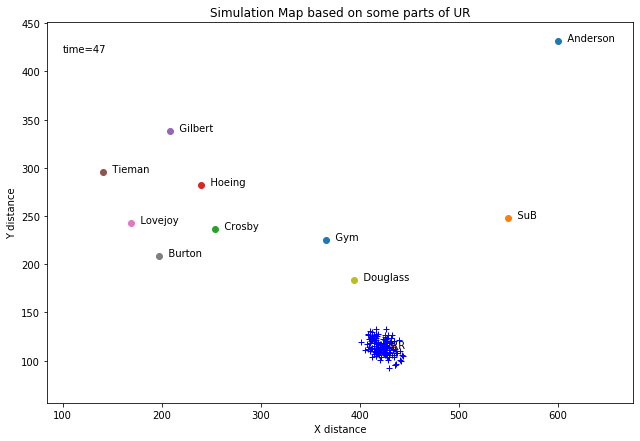

In [10]:
# That's how to create dymamic simulation，the curx of dynamic plot is retrieved from [5]
# This may take some time, if you do not want to experience the process, you can trun to the video I submit on blackboard
%matplotlib inline

x1=3
x2=24
y1=2
y2=16



for i in range(t):
    pl.clf()
    plt.figure(figsize=((x2-x1)/2,(y2-y1)/2))  
    for ii in D:
        contemp=D[ii]
        plt.plot(contemp[0],contemp[1],'o')
        plt.text(contemp[0],contemp[1],'   '+ii)
    
    for j in range(N):
        if student[j][3*i+10] == 0:
            c='blue'
            m='+'
        if student[j][3*i+10] == 1:
            c='red'
            m='x'
        #if student[j][3*i+10] == 2:
        #    c='red'
        #    m='x'
        plt.plot(student[j][3*i+8],student[j][3*i+9],marker=m,color=c)
    plt.text(100,420,'time='+str(i))
    plt.xlim(x1*28.18,x2*28.18)
    plt.ylim(y1*28.18,y2*28.18)
    plt.title('Simulation Map based on some parts of UR')
    plt.xlabel('X distance')
    plt.ylabel('Y distance')

    
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)
    plt.close()

Reference
1. https://github.com/nytimes/covid-19-data/blob/master/us.csv
2. https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html
3. https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease
4. http://www.sci.wsu.edu/math/faculty/hudelson/logisticlesson.html
5. https://stackoverflow.com/questions/34486642/what-is-the-currently-correct-way-to-dynamically-update-plots-in-jupyter-ipython
6. Professor White's notes